<a href="https://colab.research.google.com/github/vimalkumarasamy/Python/blob/master/Sensor_timeseries_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# loading the dataset
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
filename ='gdrive/My Drive/raw_data.csv'

In [0]:
# manually reading the data

data=[]
for f in open(filename):
  f=f.replace("\n","")
  x=f.split(",")
  # x[0]=int(x[0])
  # x[1]=int(x[1])
  data=data+[x]

In [0]:
data=data[1:]

In [0]:
data_int=[]
for i in data:
  data_int=data_int+[[float(i[0]), float(i[1])]]


In [0]:
import numpy as np 
import pandas as pd
raw_data_np=np.array(data_int)

In [32]:
raw_data_np.shape

(14430, 2)

In [0]:
# reading the data directly through pandas
raw_data_pd=pd.read_csv(filename)

In [0]:
# saving a field in a numpy array
time=raw_data_pd["timestamp"].values

In [45]:
raw_data_pd.head

<bound method NDFrame.head of            timestamp  SKAP_18PI2317/Y/10sSAMP|average
0      1367366400000                       258.412295
1      1367370000000                       258.405007
2      1367373600000                       258.396525
3      1367377200000                       258.388992
4      1367380800000                       258.382630
...              ...                              ...
14425  1420052400000                       190.888991
14426  1420056000000                       190.887880
14427  1420059600000                       190.886559
14428  1420063200000                       190.885321
14429  1420066800000                       190.884053

[14430 rows x 2 columns]>

In [0]:
metric=raw_data_pd["SKAP_18PI2317/Y/10sSAMP|average"].values

In [0]:
import matplotlib.pyplot as plt

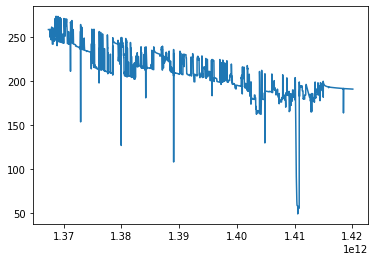

In [51]:
# plotting the time and metric data - timeseries
plt.plot(time, metric)

In [0]:
# making a polynomial fit, of first order
z = np.polyfit(time, metric, 1)
# z is an object with slope and intercept

# creating a function for the given timestamp, it returns the metric from fitted data
p = np.poly1d(z)

In [0]:
fit=p(time)

In [67]:
fit.shape

(14430,)

In [0]:
plt.plot(time, metric)

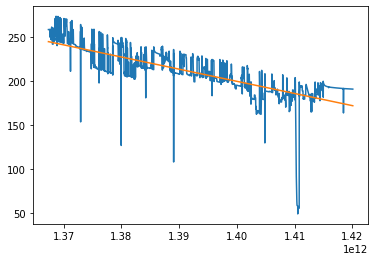

In [68]:
# plotting the actual data and the fitted data
plt.plot(time,metric)
plt.plot(time,fit)


In [0]:
# computing the residual based on which we can study the outlier points
residual=abs(metric-fit)

In [101]:
residual.shape

(14430,)

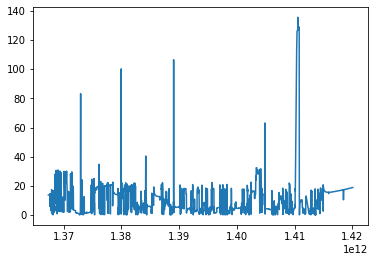

In [102]:
plt.plot(time,residual)

(array([1.147e+03, 1.484e+03, 1.267e+03, 1.847e+03, 8.260e+02, 7.230e+02,
        5.310e+02, 4.820e+02, 2.000e+02, 5.420e+02, 6.830e+02, 9.720e+02,
        1.024e+03, 9.140e+02, 7.380e+02, 3.550e+02, 6.400e+01, 2.900e+01,
        4.900e+01, 7.800e+01, 1.560e+02, 2.500e+01, 5.700e+01, 7.100e+01,
        2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        2.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        2.000e+00, 2.000e+00, 1.000e+0

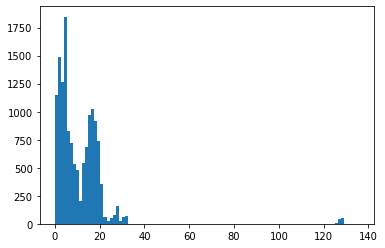

In [103]:
# histogram to study the residual
plt.hist(residual, bins=100)

In [0]:
# finding the 90th percentile based on which we can identify the high residual
per_10=np.percentile(residual, 90)


In [0]:
# manipulating the residual based on a condition
residual_top10=np.where(residual > per_10, residual, 0)

In [109]:
residual_top10

array([0., 0., 0., ..., 0., 0., 0.])

In [0]:
# choosing the index with nonzero value
residual_top10_index=np.nonzero(residual_top10)

In [0]:
residual_top10_points=residual_top10_index[0]

In [0]:
# for the indices, lets slice the absolute values of metric and time
metric_highresidual=metric[residual_top10_points]
time_highresidual=time[residual_top10_points]


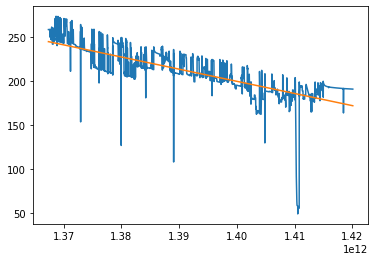

In [113]:

plt.plot(time,metric)
plt.plot(time,fit)

# overlaying the abs points


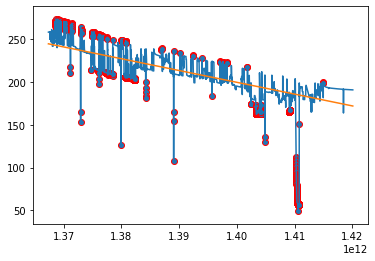

In [114]:
# overlaying the high residual points on top of the absolute trend line
plt.plot(time,metric)
plt.plot(time,fit)
plt.scatter(time_highresidual,metric_highresidual,edgecolors='r')


In [0]:
# similar manipulations for low residual points

per_low=np.percentile(residual, 10)
residual_bt10=np.where(residual < per_low, residual, 0)
residual_bt10_index=np.nonzero(residual_bt10)
residual_bt10_points=residual_bt10_index[0]

metric_lowresidual=metric[residual_bt10_points]
time_lowresidual=time[residual_bt10_points]


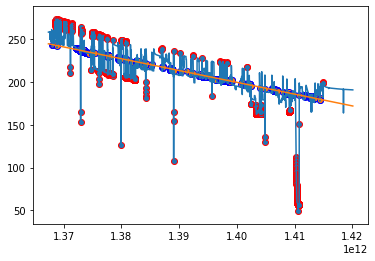

In [118]:
# making a final plot with high residual and low residual points
plt.plot(time,metric)
plt.plot(time,fit)
plt.scatter(time_highresidual,metric_highresidual,edgecolors='r')
plt.scatter(time_lowresidual,metric_lowresidual,edgecolors='b')